<a href="https://colab.research.google.com/github/thinh2904/ThayHanh/blob/main/BT_Ngay_13_05_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scipy==1.6.3

In [4]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
from scipy import stats, interpolate
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import ttest_1samp

In [6]:
gia_nha_dat_us = pd.read_csv('gia_nha_dat_us.csv')
df = gia_nha_dat_us[['MSSubClass', 'MSZoning', 'LotArea', 'SalePrice']]
df.head()

,MSSubClass,MSZoning,LotArea,SalePrice
0,60,RL,8450,208500
1,20,RL,9600,181500
2,60,RL,11250,223500
3,70,RL,9550,140000
4,60,RL,14260,250000


In [7]:
data = df['SalePrice']
data = np.log1p(data)

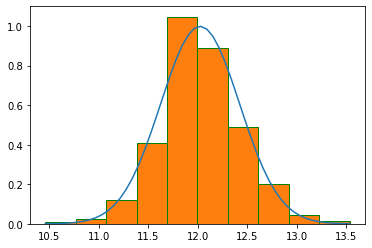

In [8]:
# Kiem tra data co chuan hay khong?
mean = np.mean(data)
# ddof=1 :: hiệu chỉnh
std = np.std(data, ddof=1)
domain = np.linspace(np.min(data), np.max(data))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(data, edgecolor='green', density=True)
plt.show()

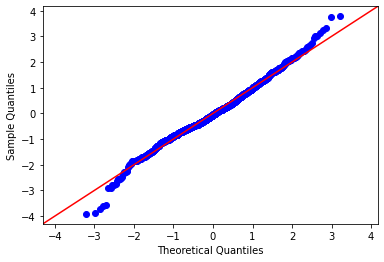

In [9]:
# Đưa dữ liệu về dạng chuẩn tắc #
def standadize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/std

sm.qqplot(standadize(data), line ='45')
plt.show()

In [10]:
my_mean = 150000
my_log_mean = np.log1p(my_mean)
print(my_log_mean)

11.918397239722838


Giả thiết thống kê:

H0: 
μ
=
11.918397239722838

H1: 
μ
≠
11.918397239722838
.

In [11]:
def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

In [12]:
# Lay ngau nhien 100 diem du lieu #
sample = data.sample(n=100)

In [13]:
#Kiem dinh mean cua sample so voi ky vong mu_0=11.918397239722838
# kiem dinh 2 phia: H0: mu = mu_0, H1: mu != mu_0
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean)
results(p)

,mean1,mean2,score,p_value,KetLuan
,12.086991,11.918397,4.211956,0.000056,Chấp nhận H1 với mức ý nghĩa 0.05


Kiểm định 1 phía

In [18]:
# alternative{‘two-sided’, ‘less’, ‘greater’}
# kiem dinh ben trai: H0 mu = mu_0, H1: mu < mu_0
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean, alternative='less')
results(p)

,mean1,mean2,score,p_value,KetLuan
,12.086991,11.918397,4.211956,0.999972,Chấp nhận H0 với mức ý nghĩa 0.05


In [17]:
# alternative{‘two-sided’, ‘less’, ‘greater’}
# kiem dinh ben phai: H0 mu = mu_0, H1: mu > mu_0
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean, alternative='greater')
results(p)

,mean1,mean2,score,p_value,KetLuan
,12.086991,11.918397,4.211956,0.000028,Chấp nhận H1 với mức ý nghĩa 0.05


Bài tập về nhà:

a) Hãy chọn giá trị n lớn hơn 100 khác nhau và chạy các thống kê ở trên để đưa ra kết luận.

b) Hãy thay đổi my_mean khác nhau để tìm ra được giá trị kỳ vọng gần với giá trị trung bình của mẫu (với mức ý nghĩa 0.05).

a)

In [19]:
sample = data.sample(n=1000)

In [20]:
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean)
results(p)

,mean1,mean2,score,p_value,KetLuan
,12.031257,11.918397,8.890824,2.783486e-18,Chấp nhận H1 với mức ý nghĩa 0.05


In [21]:
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean, alternative='less')
results(p)

,mean1,mean2,score,p_value,KetLuan
,12.031257,11.918397,8.890824,1.0,Chấp nhận H0 với mức ý nghĩa 0.05


In [22]:
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean, alternative='greater')
results(p)

,mean1,mean2,score,p_value,KetLuan
,12.031257,11.918397,8.890824,1.391743e-18,Chấp nhận H1 với mức ý nghĩa 0.05


b)

In [28]:
my_mean = 165000
my_log_mean = np.log1p(my_mean)
print(my_log_mean)

12.013706813470414


In [29]:
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean)
results(p)

,mean1,mean2,score,p_value,KetLuan
,12.031257,12.013707,1.382563,0.167108,Chấp nhận H0 với mức ý nghĩa 0.05


In [30]:
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean, alternative='less')
results(p)

,mean1,mean2,score,p_value,KetLuan
,12.031257,12.013707,1.382563,0.916446,Chấp nhận H0 với mức ý nghĩa 0.05


In [31]:
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean, alternative='greater')
results(p)

,mean1,mean2,score,p_value,KetLuan
,12.031257,12.013707,1.382563,0.083554,Chấp nhận H0 với mức ý nghĩa 0.05
